<a href="https://colab.research.google.com/github/LuisAdrian13/parcialsis/blob/main/parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Señales y Sistemas

- ## [Librería numpy](https://numpy.org/) (señales digitales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

<StemContainer object of 3 artists>

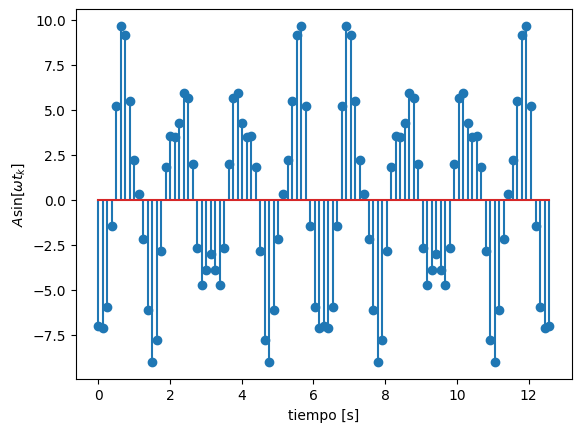

In [69]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

n=50 #nuemro de muestra
T=2*np.pi # periodo de la señal cuasi-periodica
F=1/T # frecuencia
Fs=n*F #frecuencia de muestreo
Ts=1/Fs #periodo de muestreo
t0=0 # tiempo inicial
tf=2*T #tiempo final
t=np.arange(t0,tf,Ts) ##vector de datos en tiempo
X=7*np.sin(4*t-np.pi/2)-2*np.cos(5*t)+2*np.cos(10*t)

plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.stem(t,X)








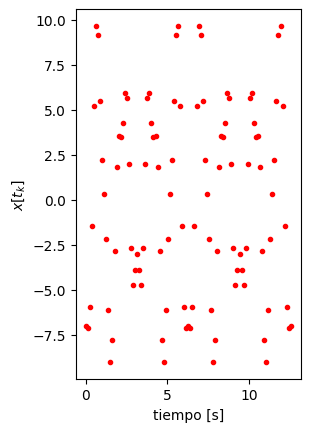

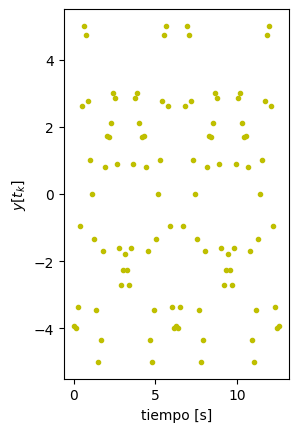

In [70]:
#cruce por cero

y_min = -5 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

yv=my_ceropen(X,ymin=-5,ymax=5)



plt.subplot(121)  # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(t,X,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.show()

plt.subplot(121)
plt.plot(t,yv,'y.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.show()


In [71]:
#número de bits y vector de cuantización
nbits=3
nmin=-5
nmax=5
ve=np.linspace(nmin,nmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax


In [72]:
#distancias y cero pendiente a vector cuantizacion
d=cdist(yv.reshape(-1,1),ve.reshape(-1,1))#se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist


In [73]:
#se require mirar cual es el valor de ve(j) mas cercano a X(i)
ind=np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila




In [74]:
print(yv[0],ind[0],ve[ind[0]])

-3.920648287535328 1 -3.571428571428571


In [75]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]



In [76]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(yv[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(yv[i],ve)) #apilar datos cuantizando si i>0


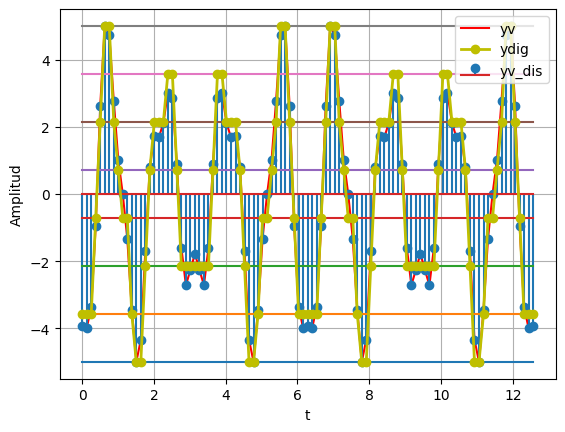

In [77]:
#graficar señales

plt.plot(t,yv,c='r', label='yv')#cs continua

plt.stem(t,yv, label='yv_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

